In [4]:
#general
import os
import pandas as pd
import numpy as np

#outside functions
import load_kmer_cnts_pasolli_jf

#data
from sklearn.utils import shuffle
from sklearn.preprocessing import normalize
from sklearn.decomposition import NMF

#plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
graph_dir = os.environ['HOME'] + '/deep_learning_microbiome/analysis/kmers/linear/'

In [6]:
def vis_NMF(data, n_components=5, init = 'random', solver='mu', beta_loss='frobenius', max_iter=1000, random_state=0, sort = False, title = "dataset"):
    model = NMF(
        n_components = n_components,
        init = init,
        solver = solver, 
        beta_loss = beta_loss,
        max_iter = max_iter, 
        random_state = random_state
    )
    
    #NMF matrixes
    V = data.T
    W = model.fit_transform(V)
    H = model.components_
    print(W.shape)
    print(H.shape)
    
    #Getting it ready for plotting
    W_all = pd.DataFrame(W)
    W_all['Features'] = pd.read_csv(kmer_dir + str(kmer_size) + "mer_dictionary.gz", compression='gzip', header=None)
    
    #Plotting
    if sort == False:
        meltedW = pd.melt(W_all, id_vars = "Features", var_name='Signature (i.e. Factor)', value_name='Weight')
        sns.set(style="white")
        g = sns.FacetGrid(meltedW, row = 'Signature (i.e. Factor)', sharey = True, size = 7)
        g.map(sns.barplot, 'Features', 'Weight', color="blue", alpha = 0.7)
        g.set(xticklabels=[])
        plt.subplots_adjust(top=.93)
        g.fig.suptitle(title)
        plt.show()
        
    elif sort == True:
        meltedW = pd.melt(W_all, id_vars = "Features", var_name='Signature (i.e. Factor)', value_name='Weight').sort_values(by = 'Weight')
        sns.set(style="white")
        g = sns.FacetGrid(meltedW, row = 'Signature (i.e. Factor)', sharey = True, size = 7)
        g.map(sns.pointplot, 'Features', 'Weight', color='purple', alpha = 0.7)
        g.set(xticklabels=[])
        plt.subplots_adjust(top=.93)
        g.fig.suptitle(title)
        plt.show()

In [7]:
data_sets_to_use = [
    #[['MetaHIT'], ['MetaHIT']],                                                                                                                                                                
    #[['Qin_et_al'], ['Qin_et_al']],                                                                                                                                                            
    #[['Zeller_2014'], ['Zeller_2014']],                                                                                                                                                        
    #[['LiverCirrhosis'], ['LiverCirrhosis']],                                                                                                                                                  
    #[['Karlsson_2013'], ['Karlsson_2013']],                                                                                                                                                    
    #[['RA'], ['RA']],                                                                                                                                                                          
    [['Feng'], ['Feng']]
]

kmer_size = 5

for data_set in data_sets_to_use:
        data_set = data_set[0]
        kmer_dir = os.environ['HOME'] + '/deep_learning_microbiome/data/' + str(kmer_size) + 'mers_jf/'

        allowed_labels = ['0', '1']
        kmer_cnts, accessions, labelz, domain_labels = load_kmer_cnts_pasolli_jf.load_kmers(kmer_size, data_set, allowed_labels)
        print("LOADED DATASET " + str(data_set[0]) + ": " + str(len(kmer_cnts)) + " SAMPLES")
        labelz=np.asarray(labelz)
        labelz=labelz.astype(np.int)

data_normalized = normalize(kmer_cnts, axis = 1, norm = 'l1')
data_normalized, labels = shuffle(data_normalized, labelz, random_state=0)

LOADED DATASET Feng: 156 SAMPLES


(512, 3)
(3, 156)


/pollard/home/abustion/miniconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/pollard/home/abustion/miniconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


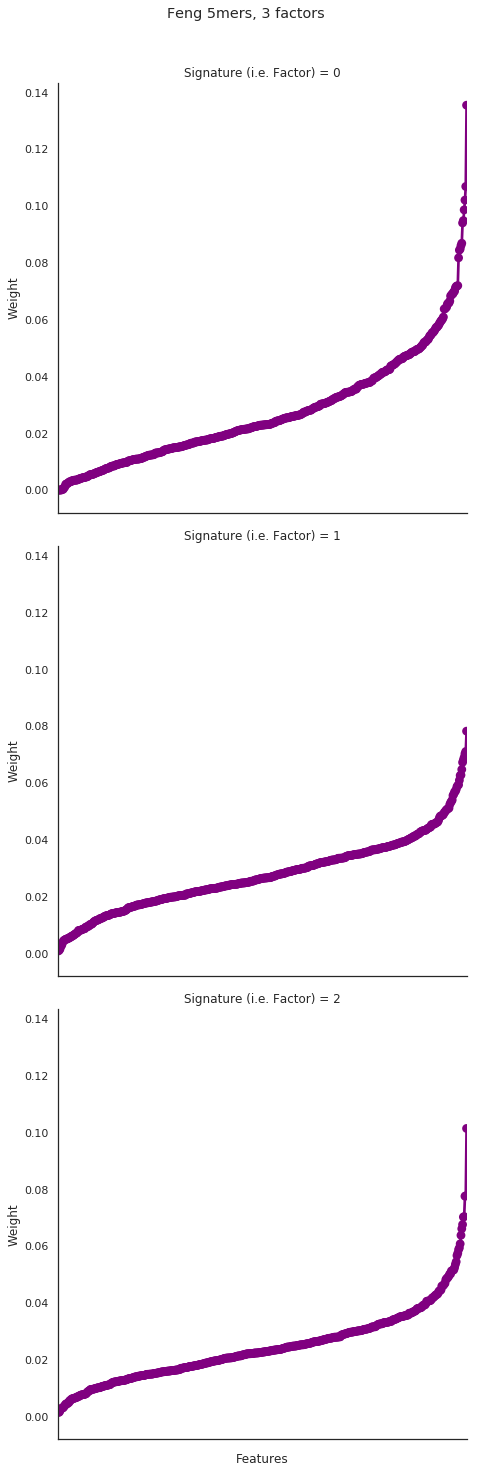

In [8]:
vis_NMF(data_normalized, n_components=3, sort = True, title="Feng 5mers, 3 factors")

In [9]:
model = NMF(
        n_components = 3,
        init = 'random',
        solver = 'mu', 
        beta_loss = 'frobenius',
        max_iter = 1000, 
        random_state = 0
    )
V = data_normalized.T
W = model.fit_transform(V)
H = model.components_
print(W.shape)
print(H.shape)
    
W_all = pd.DataFrame(W)
W_all['Features'] = pd.read_csv(kmer_dir + str(kmer_size) + "mer_dictionary.gz", compression='gzip', header=None)
    
meltedW = pd.melt(W_all, id_vars = "Features", var_name='Signature (i.e. Factor)', value_name='Weight')

(512, 3)
(3, 156)


In [17]:
meltedW.loc[meltedW['Signature (i.e. Factor)'] == 0].sort_values(by="Weight", ascending=False)

,Features,Signature (i.e. Factor),Weight
0,AAAAA,0,1.354890e-01
3,AAAAT,0,1.068815e-01
32,AAGAA,0,1.020906e-01
384,GAAAA,0,9.865442e-02
120,AGAAA,0,9.488737e-02
8,AAAGA,0,9.405479e-02
2,AAAAG,0,8.690538e-02
50,AATAT,0,8.607718e-02
12,AAATA,0,8.488599e-02
174,ATAAA,0,8.447385e-02


In [15]:
meltedW.sort_values(by="Weight", ascending=False)

,Features,Signature (i.e. Factor),Weight
0,AAAAA,0,1.354890e-01
3,AAAAT,0,1.068815e-01
32,AAGAA,0,1.020906e-01
1024,AAAAA,2,1.014483e-01
384,GAAAA,0,9.865442e-02
120,AGAAA,0,9.488737e-02
8,AAAGA,0,9.405479e-02
2,AAAAG,0,8.690538e-02
50,AATAT,0,8.607718e-02
12,AAATA,0,8.488599e-02


(512, 3)
(3, 156)


/pollard/home/abustion/miniconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/pollard/home/abustion/miniconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


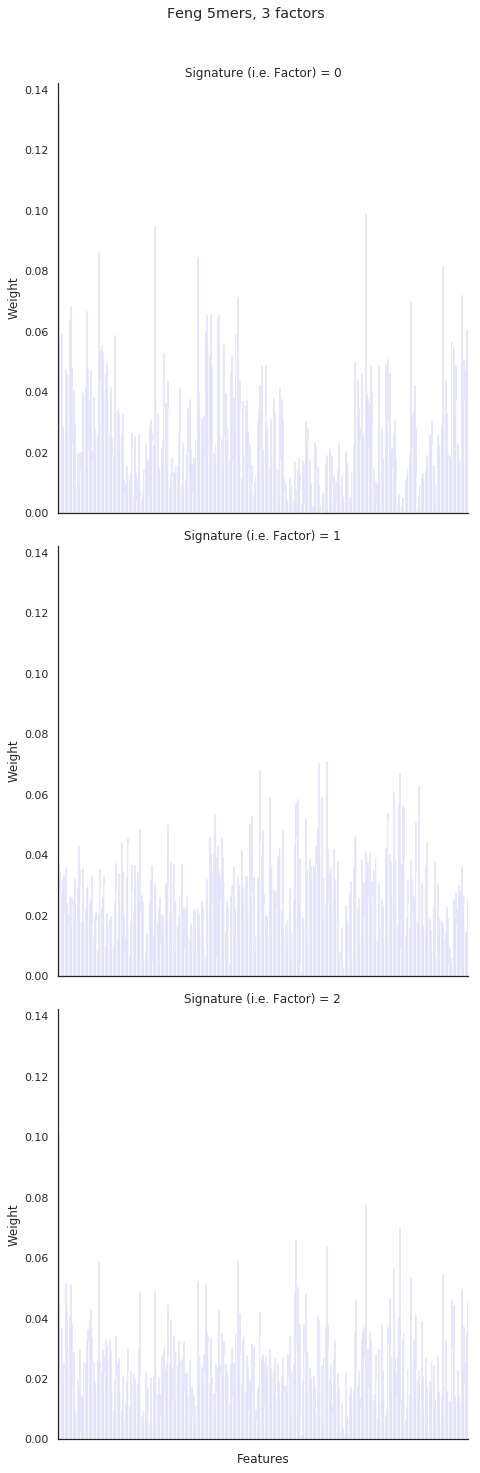

In [54]:
vis_NMF(data_normalized, n_components=3, sort = False, title="Feng 5mers, 3 factors")

In [66]:
data_sets_to_use = [
    #[['MetaHIT'], ['MetaHIT']],                                                                                                                                                                
    #[['Qin_et_al'], ['Qin_et_al']],                                                                                                                                                            
    [['Zeller_2014'], ['Zeller_2014']],                                                                                                                                                        
    #[['LiverCirrhosis'], ['LiverCirrhosis']],                                                                                                                                                  
    #[['Karlsson_2013'], ['Karlsson_2013']],                                                                                                                                                    
    #[['RA'], ['RA']],                                                                                                                                                                          
    #[['Feng'], ['Feng']]
]

kmer_size = 5

for data_set in data_sets_to_use:
        data_set = data_set[0]
        kmer_dir = os.environ['HOME'] + '/deep_learning_microbiome/data/' + str(kmer_size) + 'mers_jf/'

        allowed_labels = ['0', '1']
        kmer_cnts, accessions, labelz, domain_labels = load_kmer_cnts_pasolli_jf.load_kmers(kmer_size, data_set, allowed_labels)
        print("LOADED DATASET " + str(data_set[0]) + ": " + str(len(kmer_cnts)) + " SAMPLES")
        labelz=np.asarray(labelz)
        labelz=labelz.astype(np.int)

data_normalized = normalize(kmer_cnts, axis = 1, norm = 'l1')
data_normalized, labels = shuffle(data_normalized, labelz, random_state=0)

LOADED DATASET Zeller_2014: 121 SAMPLES


(512, 5)
(5, 121)


/pollard/home/abustion/miniconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


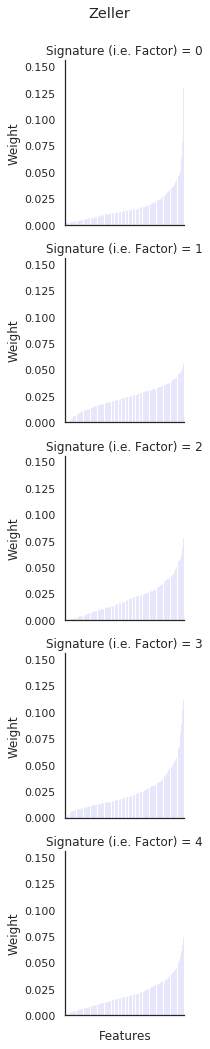

In [83]:
vis_NMF(data_normalized, n_components=5, sort = True, title = "Zeller")